In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [7]:
circuit=QuantumCircuit(2,2)

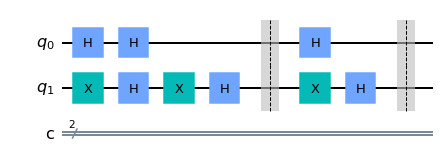

In [10]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')


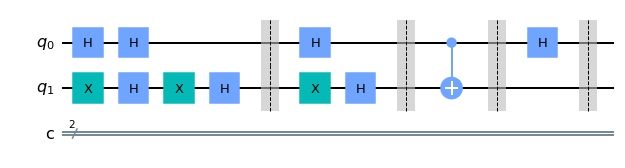

In [11]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')


In [12]:
circuit.measure(0,0)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


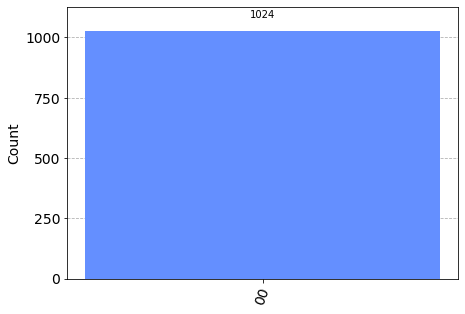

In [13]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=backend,shots=1024).result()
counts=result.get_counts(circuit)
plot_histogram([counts])

In [14]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
provider = IBMQ.get_provider("ibm-q")

In [16]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [17]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits ")

ibmq_qasm_simulator : 0 & simulated qubits 
ibmq_lima : 0 & 5 qubits 
ibmq_belem : 17 & 5 qubits 
ibmq_quito : 12 & 5 qubits 
simulator_statevector : 0 & simulated qubits 
simulator_mps : 0 & simulated qubits 
simulator_extended_stabilizer : 0 & simulated qubits 
simulator_stabilizer : 0 & simulated qubits 
ibmq_manila : 0 & 5 qubits 
ibm_nairobi : 19 & 7 qubits 
ibm_oslo : 26 & 7 qubits 


In [18]:
quantum_computer = provider.get_backend('ibmq_belem')

In [ ]:
quantum_result = execute(circuit,backend=quantum_computer,shots=1024).result()

In [ ]:
quantum_counts=quantum_result.get_counts(circuit)
plot_histogram([quantum_counts])